In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
FT = 8
plt.rcParams.update({'font.size': FT})
import numpy as np
import scipy.io as io

import sys
sys.path.append('./../../../parametric-discovery/')
from best_subset import get_decreasing_vals, find_transition, find_transition_V2, find_transition_V3, find_transition_V4, find_transition_V5

from datetime import date
def today(): return date.today().strftime("%Y%m%d")
from os.path import join as join_path
FIGURE_EXPORT_PATH = "./vis_pics/"

## 2D-big

In [2]:
udata = io.loadmat("./reaction_diffustion_2d_big_u_stlsq_bnb_frols_bruteforce_noise_lv10.mat")
rel_bic_scores_u = udata["rel_bic_scores"][0]
complexities_u = udata["complexities"][0]

vdata = io.loadmat("./reaction_diffustion_2d_big_v_stlsq_bnb_frols_bruteforce_noise_lv10.mat")
rel_bic_scores_v = vdata["rel_bic_scores"][0]
complexities_v = vdata["complexities"][0]

print(udata['percent_coefficient_error_mean'][0][0], 
      udata['percent_coefficient_error_std'][0][0])
print(vdata['percent_coefficient_error_mean'][0][0], 
      vdata['percent_coefficient_error_std'][0][0])

3.1176646941363617 1.0275748708131187
3.3250884079139156 1.2489754144067837


In [3]:
mini = min(np.minimum(complexities_u, complexities_v))
maxi = max(np.maximum(complexities_u, complexities_v))

In [4]:
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_u*1e3+udata["min_bic_score"][0], complexities_u)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 7: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) == 7: print('OK!')
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_v*1e3+vdata["min_bic_score"][0], complexities_v)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 7: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) == 7: print('OK!')

7 improves 6
Percent improve: 0.09583737702917063
8 does not improve 7
Percent improve: 0.0015569019691942943
OK!
7 improves 6
Percent improve: 0.10549507638620763
8 does not improve 7
Percent improve: 0.000973592640045278
OK!


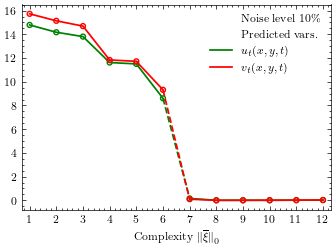

In [5]:
with plt.style.context('science'):
    fig, ax = plt.subplots()
    ax.plot([], [], ' ', label="Noise level 10\%")
    ax.plot([], [], ' ', label="Predicted vars.")
    ax.plot(complexities_u[:6], rel_bic_scores_u[:6], color='green', linewidth=2.5/2, label='$u_t(x, y, t)$', zorder=1)
    ax.plot(complexities_u[5:7], rel_bic_scores_u[5:7], '--', color='green', linewidth=2.5/2, zorder=1)
    ax.plot(complexities_u[6:], rel_bic_scores_u[6:], color='green', linewidth=2.5/2, zorder=1)
    ax.scatter(complexities_u, rel_bic_scores_u, marker='o', fc='none', ec='green', s=25/2, zorder=1)
    
    ax.plot(complexities_v[:6], rel_bic_scores_v[:6], color='red', linewidth=2.5/2, label='$v_t(x, y, t)$', zorder=2)
    ax.plot(complexities_v[5:7], rel_bic_scores_v[5:7], '--', color='red', linewidth=2.5/2, zorder=2)
    ax.plot(complexities_v[6:], rel_bic_scores_v[6:], color='red', linewidth=2.5/2, zorder=2)
    ax.scatter(complexities_v, rel_bic_scores_v, marker='o', fc='none', ec='red', s=25/2, zorder=2)
    
    plt.xlim(mini-0.3, maxi+0.3)
    plt.xticks([i for i in range(mini, maxi+1)])
    # plt.ylabel(r"Relative BIC ($\times 10^{3}$)", fontsize=FT)
    plt.xlabel(r"Complexity $\lVert\overline{\xi}\rVert^{}_{0}$", fontsize=FT)
    plt.tight_layout()
    plt.legend(fontsize=FT)
    plt.savefig(join_path(FIGURE_EXPORT_PATH, "./2D_big.pdf"))
    plt.show()

## 3D 
    - n = 64

In [6]:
udata = io.loadmat("./reaction_diffustion_3d_64_u_sr3_bnb_frols_noise_lv0.04.mat")
rel_bic_scores_u = udata["rel_bic_scores"][0]
complexities_u = udata["complexities"][0]

vdata = io.loadmat("./reaction_diffustion_3d_64_v_sr3_bnb_frols_noise_lv0.04.mat")
rel_bic_scores_v = vdata["rel_bic_scores"][0]
complexities_v = vdata["complexities"][0]

print(udata['percent_coefficient_error_mean'][0][0], 
      udata['percent_coefficient_error_std'][0][0])
print(vdata['percent_coefficient_error_mean'][0][0], 
      vdata['percent_coefficient_error_std'][0][0])

0.08588200850846384 0.0973849324665898
0.05842282826471952 0.03375502859786496


In [7]:
mini = min(np.minimum(complexities_u, complexities_v))
maxi = max(np.maximum(complexities_u, complexities_v))

In [8]:
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_u*1e3+udata["min_bic_score"][0], complexities_u)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 6: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) == 6: print('OK!')
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_v*1e3+vdata["min_bic_score"][0], complexities_v)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 5: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) == 5: print('OK!')

6 improves 5
Percent improve: 0.11442164973014553
OK!
5 improves 4
Percent improve: 0.23007968905170476
OK!


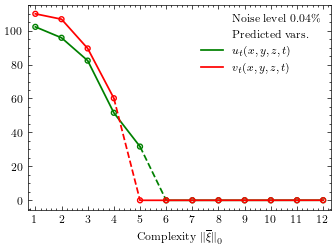

In [9]:
with plt.style.context('science'):
    fig, ax = plt.subplots()
    ax.plot([], [], ' ', label="Noise level 0.04\%")
    ax.plot([], [], ' ', label="Predicted vars.")
    ax.plot(complexities_u[:5], rel_bic_scores_u[:5], color='green', linewidth=2.5/2, label='$u_t(x, y, z, t)$', zorder=1)
    ax.plot(complexities_u[4:6], rel_bic_scores_u[4:6], '--', color='green', linewidth=2.5/2, zorder=1)
    ax.plot(complexities_u[5:], rel_bic_scores_u[5:], color='green', linewidth=2.5/2, zorder=1)
    ax.scatter(complexities_u, rel_bic_scores_u, marker='o', fc='none', ec='green', s=25/2, zorder=1)
    
    ax.plot(complexities_v[:4], rel_bic_scores_v[:4], color='red', linewidth=2.5/2, label='$v_t(x, y, z, t)$', zorder=2)
    ax.plot(complexities_v[3:5], rel_bic_scores_v[3:5], '--', color='red', linewidth=2.5/2, zorder=2)
    ax.plot(complexities_v[4:], rel_bic_scores_v[4:], color='red', linewidth=2.5/2, zorder=2)
    ax.scatter(complexities_v, rel_bic_scores_v, marker='o', fc='none', ec='red', s=25/2, zorder=2)
    
    plt.xlim(mini-0.3, maxi+0.3)
    plt.xticks([i for i in range(mini, maxi+1)])
    # plt.ylabel(r"Relative BIC ($\times 10^{3}$)", fontsize=FT)
    plt.xlabel(r"Complexity $\lVert\overline{\xi}\rVert^{}_{0}$", fontsize=FT)
    plt.tight_layout()
    plt.legend(fontsize=FT)
    plt.savefig(join_path(FIGURE_EXPORT_PATH, "./3D_64.pdf"))
    plt.show()

## 3D
    - n = 128

In [10]:
udata = io.loadmat("./reaction_diffustion_3d_128_u_sr3_bnb_frols_noise_lv0.1.mat")
rel_bic_scores_u = udata["rel_bic_scores"][0]
complexities_u = udata["complexities"][0]

vdata = io.loadmat("./reaction_diffustion_3d_128_v_sr3_bnb_frols_noise_lv0.1.mat")
rel_bic_scores_v = vdata["rel_bic_scores"][0]
complexities_v = vdata["complexities"][0]

print(udata['percent_coefficient_error_mean'][0][0], 
      udata['percent_coefficient_error_std'][0][0])
print(vdata['percent_coefficient_error_mean'][0][0], 
      vdata['percent_coefficient_error_std'][0][0])

0.04903734758057313 0.0720098613077069
0.007095281555447451 0.007249215450554728


In [11]:
mini = min(np.minimum(complexities_u, complexities_v))
maxi = max(np.maximum(complexities_u, complexities_v))

In [12]:
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_u*1e3+udata["min_bic_score"][0], complexities_u)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 6: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) == 6: print('OK!')
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_v*1e3+vdata["min_bic_score"][0], complexities_v)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 5: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) == 5: print('OK!')

6 improves 5
Percent improve: 0.1346618017157217
OK!
5 improves 4
Percent improve: 0.256844199614386
OK!


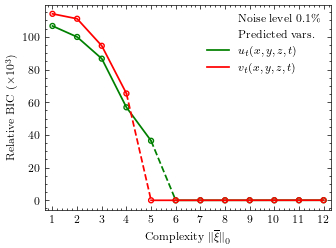

In [13]:
with plt.style.context('science'):
    fig, ax = plt.subplots()
    ax.plot([], [], ' ', label="Noise level 0.1\%")
    ax.plot([], [], ' ', label="Predicted vars.")
    ax.plot(complexities_u[:5], rel_bic_scores_u[:5], color='green', linewidth=2.5/2, label='$u_t(x, y, z, t)$', zorder=1)
    ax.plot(complexities_u[4:6], rel_bic_scores_u[4:6], '--', color='green', linewidth=2.5/2, zorder=1)
    ax.plot(complexities_u[5:], rel_bic_scores_u[5:], color='green', linewidth=2.5/2, zorder=1)
    ax.scatter(complexities_u, rel_bic_scores_u, marker='o', fc='none', ec='green', s=25/2, zorder=1)
    
    ax.plot(complexities_v[:4], rel_bic_scores_v[:4], color='red', linewidth=2.5/2, label='$v_t(x, y, z, t)$', zorder=2)
    ax.plot(complexities_v[3:5], rel_bic_scores_v[3:5], '--', color='red', linewidth=2.5/2, zorder=2)
    ax.plot(complexities_v[4:], rel_bic_scores_v[4:], color='red', linewidth=2.5/2, zorder=2)
    ax.scatter(complexities_v, rel_bic_scores_v, marker='o', fc='none', ec='red', s=25/2, zorder=2)
    
    plt.xlim(mini-0.3, maxi+0.3)
    plt.xticks([i for i in range(mini, maxi+1)])
    plt.ylabel(r"Relative BIC ($\times 10^{3}$)", fontsize=FT)
    plt.xlabel(r"Complexity $\lVert\overline{\xi}\rVert^{}_{0}$", fontsize=FT)
    plt.tight_layout()
    plt.legend(fontsize=FT)
    plt.savefig(join_path(FIGURE_EXPORT_PATH, "./3D_128.pdf"))
    plt.show()

## 3D
    - n = 32

In [14]:
udata = io.loadmat("./reaction_diffustion_3d_32_u_sr3_bnb_frols_noise_lv0.mat")
rel_bic_scores_u = udata["rel_bic_scores"][0]
complexities_u = udata["complexities"][0]

vdata = io.loadmat("./reaction_diffustion_3d_32_v_sr3_bnb_frols_noise_lv0.mat")
rel_bic_scores_v = vdata["rel_bic_scores"][0]
complexities_v = vdata["complexities"][0]

print(udata['percent_coefficient_error_mean'][0][0], 
      udata['percent_coefficient_error_std'][0][0])
print(vdata['percent_coefficient_error_mean'][0][0], 
      vdata['percent_coefficient_error_std'][0][0])

nan nan
nan nan


In [15]:
mini = min(np.minimum(complexities_u, complexities_v))
maxi = max(np.maximum(complexities_u, complexities_v))

In [16]:
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_u*1e3+udata["min_bic_score"][0], complexities_u)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 4: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) < 6: print('OK!')
d_bic_scores, d_complexities, _ = get_decreasing_vals(rel_bic_scores_v*1e3+vdata["min_bic_score"][0], complexities_v)
# if find_transition_V4(d_bic_scores, d_complexities, 0.099) == 4: print('OK!')
if find_transition_V5(d_bic_scores, d_complexities, 0.09, 0.01) < 5: print('OK!')

4 improves 3
Percent improve: 0.09554126483571235
5 does not improve 4
Percent improve: 0.016497336028141265
OK!
4 improves 3
Percent improve: 0.09245890138779418
5 does not improve 4
Percent improve: 0.021064412613262213
OK!


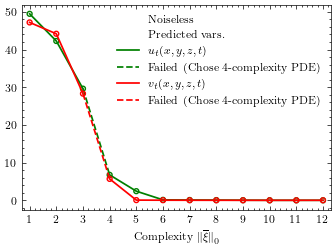

In [17]:
with plt.style.context('science'):
    fig, ax = plt.subplots()
    ax.plot([], [], ' ', label="Noiseless")
    ax.plot([], [], ' ', label="Predicted vars.")
    ax.plot(complexities_u[:3], rel_bic_scores_u[:3], color='green', linewidth=2.5/2, label='$u_t(x, y, z, t)$', zorder=1)
    ax.plot(complexities_u[2:4], rel_bic_scores_u[2:4], '--', color='green', linewidth=2.5/2, label="Failed (Chose 4-complexity PDE)", zorder=1)
    ax.plot(complexities_u[3:], rel_bic_scores_u[3:], color='green', linewidth=2.5/2, zorder=1)
    ax.scatter(complexities_u, rel_bic_scores_u, marker='o', fc='none', ec='green', s=25/2, zorder=1)
    
    ax.plot(complexities_v[:3], rel_bic_scores_v[:3], color='red', linewidth=2.5/2, label='$v_t(x, y, z, t)$', zorder=2)
    ax.plot(complexities_v[2:4], rel_bic_scores_v[2:4], '--', color='red', linewidth=2.5/2, label="Failed (Chose 4-complexity PDE)", zorder=2)
    ax.plot(complexities_v[3:], rel_bic_scores_v[3:], color='red', linewidth=2.5/2, zorder=2)
    ax.scatter(complexities_v, rel_bic_scores_v, marker='o', fc='none', ec='red', s=25/2, zorder=2)
    
    plt.xlim(mini-0.3, maxi+0.3)
    plt.xticks([i for i in range(mini, maxi+1)])
    # plt.ylabel(r"Relative BIC ($\times 10^{3}$)", fontsize=FT)
    plt.xlabel(r"Complexity $\lVert\overline{\xi}\rVert^{}_{0}$", fontsize=FT)
    plt.tight_layout()
    plt.legend(fontsize=FT)
    plt.savefig(join_path(FIGURE_EXPORT_PATH, "./3D_32.pdf"))
    plt.show()

In [18]:
# with plt.style.context('science'):
#     fig, ax = plt.subplots()
#     ax.plot([], [], ' ', label="Noiseless")
#     ax.plot([], [], ' ', label="Predicted vars.")
#     ax.plot(complexities_u[:3], rel_bic_scores_u[:3], color='green', linewidth=2.5/2, label='$u_t(x, y, z, t)$', zorder=1)
#     ax.plot(complexities_u[2:4], rel_bic_scores_u[2:4], '--', color='green', linewidth=2.5/2, label="Failed (Chose 4-complexity)", zorder=1)
#     ax.plot(complexities_u[3:], rel_bic_scores_u[3:], color='green', linewidth=2.5/2, zorder=1)
#     ax.scatter(complexities_u, rel_bic_scores_u, marker='o', fc='none', ec='green', s=25/2, zorder=1)
    
#     ax.plot(complexities_v, rel_bic_scores_v, color='red', linewidth=2.5/2, label='$v_t(x, y, z, t)$', zorder=2)
#     ax.scatter(complexities_v[:2], rel_bic_scores_v[:2], marker='o', fc='none', ec='red', s=25/2, zorder=2)
#     ax.scatter(complexities_v[2:3], rel_bic_scores_v[2:3], marker='o', linestyle='--', fc='none', ec='red', s=25/2, label="Failed (Chose 3-complexity)", zorder=2)
#     ax.scatter(complexities_v[3:], rel_bic_scores_v[3:], marker='o', fc='none', ec='red', s=25/2, zorder=2)
    
#     plt.xlim(mini-0.3, maxi+0.3)
#     plt.xticks([i for i in range(mini, maxi+1)])
#     plt.ylabel(r"Relative BIC ($\times 10^{3}$)", fontsize=FT)
#     plt.xlabel(r"Complexity $\lVert\overline{\xi}\rVert^{}_{0}$", fontsize=FT)
#     plt.tight_layout()
#     plt.legend(fontsize=FT)
#     plt.savefig(join_path(FIGURE_EXPORT_PATH, "./3D_32.pdf"))
#     plt.show()